# <font color='red'>Basic Analytics Applied to Training Set of Heroes of the Storm Game Data</font>

### 1. Determine the best Heroes(in terms of win rate) in each category:
* Support
* Assassin
* Warrior
* Specialist

### 2. Determine the best Team Composition in term of win rate

### 3. Does the map affect the team composition?

### 4. Which Assassin is better; ranged or melee?

### 5. What are the most played Heroes in each category?  Are they the most likely heroes to win?


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#load both csv files into tow respective dataframes
DF_Replay = pd.read_csv("TSReplay.csv")

DF_Characters = pd.read_csv("TSCharacters.csv")
#Low_Memory=False to handle large csv file

DF_Map_Groups = pd.read_csv("HeroAndMap.csv")

In [2]:
DF_Replay.head(2)

,ReplayID,GameMode(3=Quick Match 4=Hero League 5=Team League),Map,Replay Length,Timestamp (UTC)
0,23915730,4,Haunted Mines,00:12:00,5/14/2015 12:55:26 AM
1,23927005,3,Cursed Hollow,00:21:00,5/14/2015 12:55:26 AM


In [3]:
DF_Characters.head(2)

,ReplayID,Is Auto Select,Hero,Hero Level,Is Winner,MMR Before
0,23915730,False,Rehgar,14,False,3170
1,23915730,False,Falstad,10,False,3330


In [4]:
DF_Map_Groups.head(2)

,ID,Name,Group,SubGroup
0,0,Unknown,NaN,NaN
1,1,Abathur,Specialist,Utility


In [5]:
#Remove all after row 49, to remove map IDs and keep all data for Heroes
DF_Map_Groups = DF_Map_Groups[:48]


#DF3 = DF.drop('ID', axis=1).drop('SubGroup', axis=1)
DF_Map_Groups = DF_Map_Groups.drop('SubGroup', axis=1).drop('ID', axis=1)


#Returning last 3 elements to check
DF_Map_Groups.iloc[45:]

,Name,Group
45,Gall,Assassin
46,Lunara,Assassin
47,Greymane,Assassin


In [6]:
#Need to merge on 'ReplayID' and duplicate entries
from pandas import merge
DF1 = pd.merge(DF_Replay, DF_Characters, left_on=["ReplayID"], right_on=['ReplayID'], how='left')
DF1.head(4)

#deleting previous dataframes create for memory reasons
del DF_Replay
del DF_Characters

In [7]:
#Need to merge on 'Name' 
DF = pd.merge(DF1, DF_Map_Groups, left_on=["Hero"], right_on=["Name"], how='left')

#delete the former dataframe DF_Map_Groups for memory's optimization
del DF_Map_Groups

In [8]:
#Saving the merged Dataframe to a csv file
#DF.to_csv("MergedData.csv")

In [9]:
#DataFrame = pd.read_csv("MergedData.csv")

In [10]:
list(DF.columns.values)

['ReplayID',
 'GameMode(3=Quick Match 4=Hero League 5=Team League)',
 'Map',
 'Replay Length',
 'Timestamp (UTC)',
 'Is Auto Select',
 'Hero',
 'Hero Level',
 'Is Winner',
 'MMR Before',
 'Name',
 'Group']

In [20]:
DF.dtypes 
#ReplayID          int64     >>>Change to Category
#GameMode          int64     >>>Replace with Category (GAME TYPE)
#Map              object
#ReplayLength     object
#Timestamp        object
#AutoSelect         bool
#Hero             object
#HeroLevel         int64
#IsWinner           bool
#MMRBefore       float64
#Name             object
#Group            object

ReplayID          int64
GameMode          int64
Map              object
ReplayLength     object
Timestamp        object
AutoSelect         bool
Hero             object
HeroLevel         int64
IsWinner           bool
MMRBefore       float64
Name             object
Group            object
dtype: object

In [13]:
#Overwrite the DataFrame's Column names to get it into correct format for future use
DF.columns = ['ReplayID', 'GameMode', 'Map', 'ReplayLength', 'Timestamp', 'AutoSelect', 'Hero', 'HeroLevel', 'IsWinner', 'MMRBefore', 'Name', 'Group']
#similar to:
#DF = DF.rename(columns = ('Replay Length':'ReplayLength'))
#DF = DF.rename(columns = {'Timestamp (UTC)':'Timestamp'})
#DF = DF.rename(columns = {'Is Auto Select':'AutoSelect'})
#...

DF.head(2)

,ReplayID,GameMode,Map,ReplayLength,Timestamp,AutoSelect,Hero,HeroLevel,IsWinner,MMRBefore,Name,Group
0,23915730,4,Haunted Mines,00:12:00,5/14/2015 12:55:26 AM,False,Rehgar,14,False,3170,Rehgar,Support
1,23915730,4,Haunted Mines,00:12:00,5/14/2015 12:55:26 AM,False,Falstad,10,False,3330,Falstad,Assassin


In [14]:
numeric = DF.select_dtypes(['int64','float64']).columns
DF[numeric].head(5)

,ReplayID,GameMode,HeroLevel,MMRBefore
0,23915730,4,14,3170
1,23915730,4,10,3330
2,23915730,4,7,3442
3,23915730,4,13,2666
4,23915730,4,10,3198


In [15]:
DF[['GameMode', 'HeroLevel', "MMRBefore"]].corr()

,GameMode,HeroLevel,MMRBefore
GameMode,1.000000,0.308032,0.054299
HeroLevel,0.308032,1.000000,0.183374
MMRBefore,0.054299,0.183374,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B1FFF50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B2A18B0>]], dtype=object)

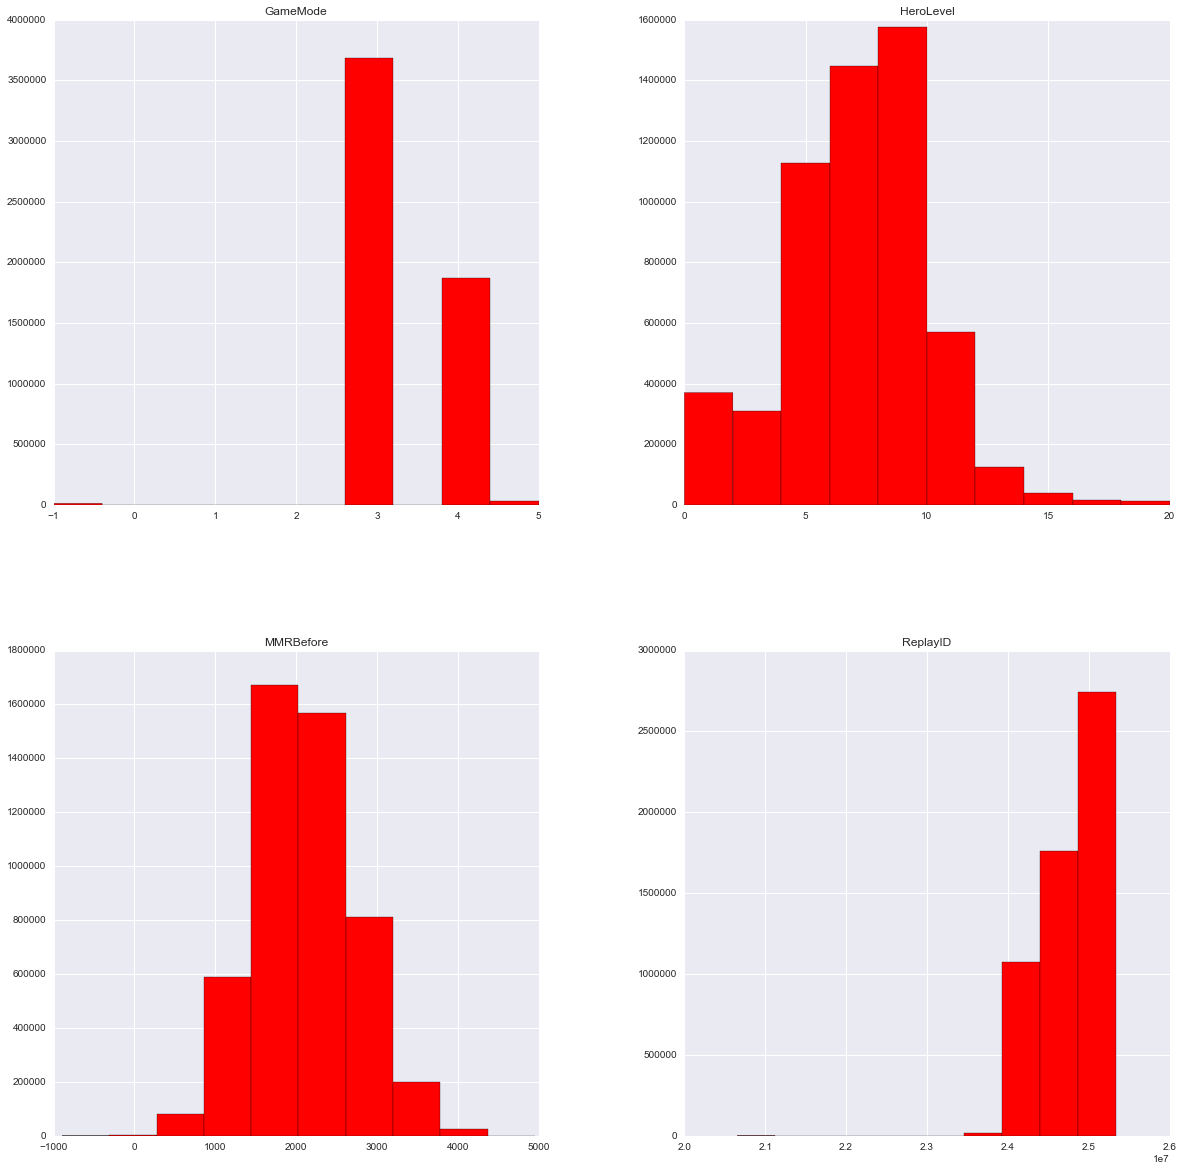

In [16]:
%matplotlib inline
DF[numeric].hist(figsize=(20, 20), color='red')
#plt.savefig("Histogram-Numeric-Features_HOT.png")

In [17]:
#Normalize Replay Lenght to have all in int(SECONDS) or float(MINUTES)
#look at the homework_2 for code on parsing based on " " and format covnersion to int or float

# parse and multiply the number and location
# XX : YY : ZZ
# X * 60 (for int(min) || X *60 *60 (for float(sec))
# Y * 1 (for int(min) || Y *1 *60 (for flaot(sec))
# Z * 0 (for int(min)) || Z *1  (for float(sec))

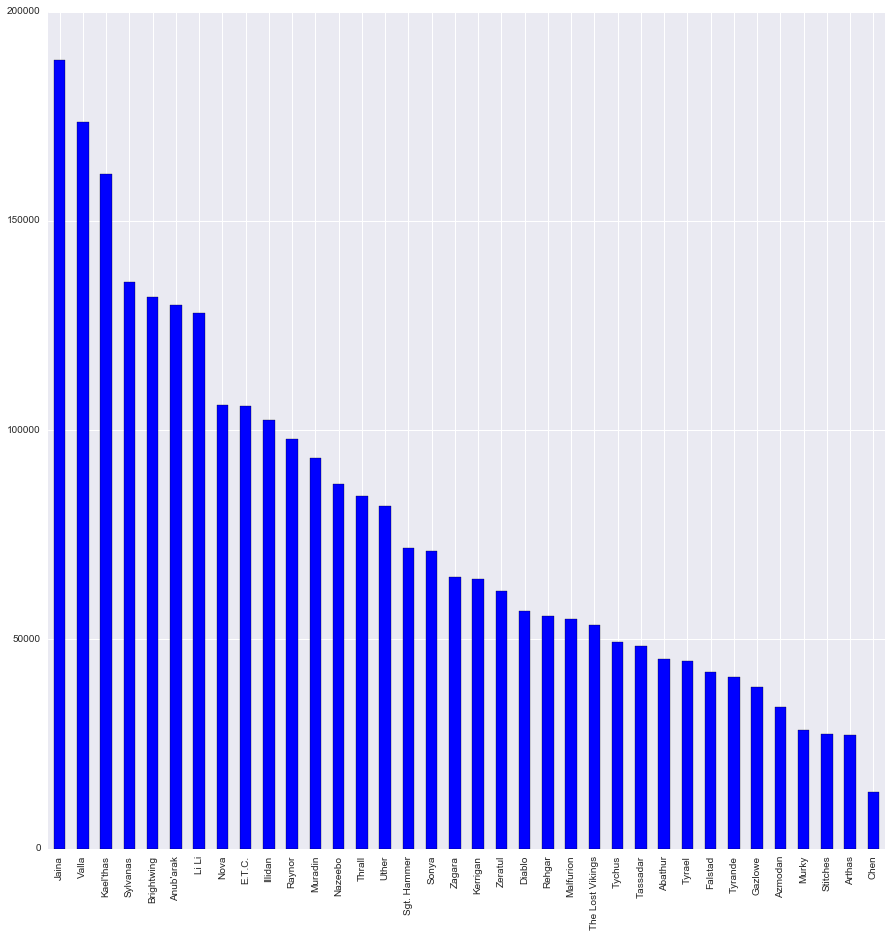

In [18]:
%matplotlib inline

Winner = DF[DF.IsWinner == True]
#Winner.head(12)

Winner.Hero.value_counts().plot(figsize=(15, 15), kind='bar')

#Winner.describe

In [19]:
%matplotlib inline

Loser = DF[DF.IsWinner == False]
#Loser.head(12)

Loser.Hero.value_counts().plot(kind='bar')

#Winner.describe

MemoryError: 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(Winner, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [ ]:
sns.set(style="dark")

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(Loser, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [ ]:
# Exploratory Data Science
    # Why most win = Jaina and Valla
    #    &
    # Most lost = Jaina and Valla
    
# Define TRAIN and TEST data sets (80-20? 70-30?)
    # define model
    # look into OSL, Kernel Density Estimation
    # Linear Regression
    # logistic Regression
    
# Establish the likeliness of winning based on team rate